In [1]:
import pandas as pd 

### 2.1.1 Import the data. 

In [2]:
batch = pd.read_excel('bakers_yeast_reference_batches.xlsx')  #Import the data
batch

,Unnamed: 0,Primary ID,BatchID,Time,Ethanol,Temperature,Molasses flow,NH3 flow,Air flow,Level,pH
0,249,250,bb,0.000000,0.05059,31.9580,212.32800,6.16453,1382.19,43.4194,5.85607
1,250,251,bb,0.166667,0.04930,31.5303,835.47600,29.78270,2084.42,43.4853,5.34603
2,251,252,bb,0.333333,0.04973,30.8220,910.15500,32.50710,2266.47,43.5628,5.18718
3,252,253,bb,0.500000,0.04915,30.1617,985.01100,36.37100,2446.84,43.6002,5.18043
4,253,254,bb,0.666667,0.04744,29.8891,1052.45000,39.26990,2636.96,43.6572,5.18145
...,...,...,...,...,...,...,...,...,...,...,...
1323,2568,2569,Xa,13.000000,0.00784,32.6918,386.12800,0.01424,6736.81,57.3615,6.15868
1324,2569,2570,Xa,13.166700,0.00652,32.7386,96.28380,0.00000,6742.49,57.4025,6.25613
1325,2570,2571,Xa,13.333300,0.00643,32.8174,44.09750,0.00712,6734.69,57.2948,6.31553
1326,2571,2572,Xa,13.500000,0.00644,32.8268,10.43010,-0.00356,6202.63,57.3891,6.34270


#### Identify how many batches are in the data.

In [3]:
print("There are {} batches in total.".format(batch.BatchID.unique().size))

There are 16 batches in total.


#### What is the duration of each batch and how many data points are there per batch? How many variables are measured (including time)?

In [4]:
duration = batch.groupby('BatchID').Time.agg([len,max,min])     #all start from time 0, then duration =max time
duration.rename(columns= {'len':'Counts of data points', 'max':'Duration'},inplace=True)
duration.drop('min',axis =1)

,Counts of data points,Duration
BatchID,,
Ma,83,13.6667
Na,83,13.6667
Ta,83,13.6667
Va,83,13.6667
Xa,83,13.6667
bb,83,13.6667
cb,83,13.6667
db,83,13.6667
eb,83,13.6667


The duration of each batch is 13.6667, and there are 83 data points are there per patch.

8 variables are measured (including time).

### 2.1.2 Plot the variables time-profiles in a 2x4 subplot.

In [5]:
df = batch.drop(['Unnamed: 0','Primary ID'],axis =1)
df.set_index('BatchID',inplace=True)
df

,Time,Ethanol,Temperature,Molasses flow,NH3 flow,Air flow,Level,pH
BatchID,,,,,,,,
bb,0.000000,0.05059,31.9580,212.32800,6.16453,1382.19,43.4194,5.85607
bb,0.166667,0.04930,31.5303,835.47600,29.78270,2084.42,43.4853,5.34603
bb,0.333333,0.04973,30.8220,910.15500,32.50710,2266.47,43.5628,5.18718
bb,0.500000,0.04915,30.1617,985.01100,36.37100,2446.84,43.6002,5.18043
bb,0.666667,0.04744,29.8891,1052.45000,39.26990,2636.96,43.6572,5.18145
...,...,...,...,...,...,...,...,...
Xa,13.000000,0.00784,32.6918,386.12800,0.01424,6736.81,57.3615,6.15868
Xa,13.166700,0.00652,32.7386,96.28380,0.00000,6742.49,57.4025,6.25613
Xa,13.333300,0.00643,32.8174,44.09750,0.00712,6734.69,57.2948,6.31553


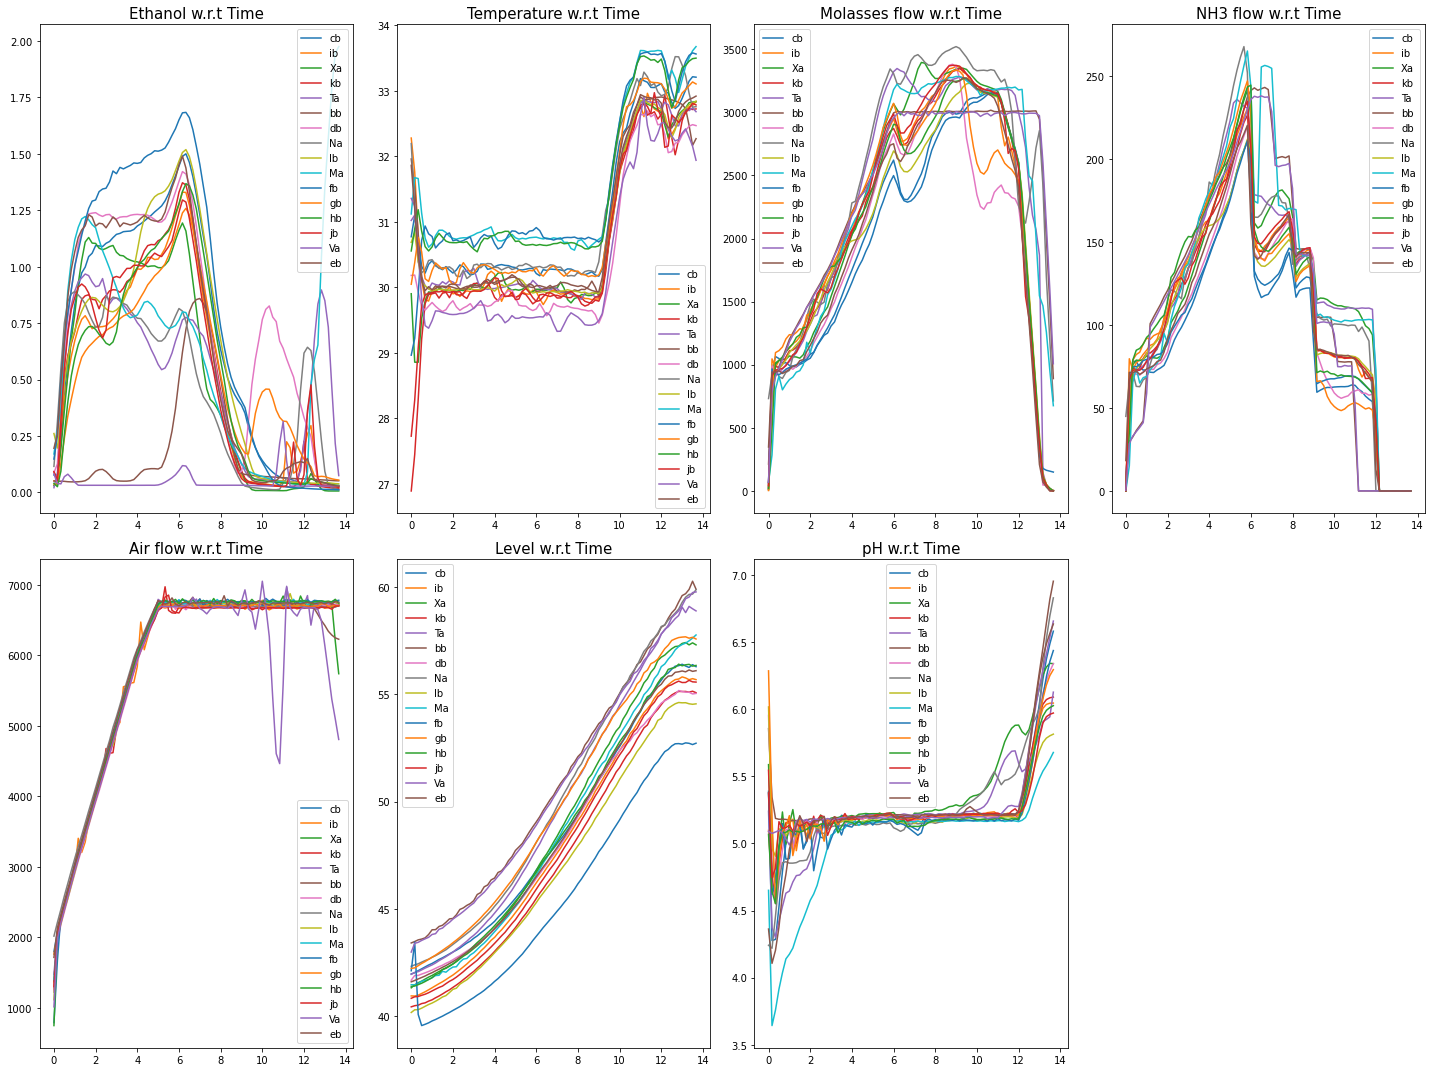

In [6]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2,4,figsize=(20,15))
n=1
for i in df.columns.drop('Time'):
    plt.subplot(2, 4, n)
    for bat in list(set(df.index)):
        df_each = df[df.index == bat]
        plt.plot(df_each.Time,df_each[i],label= bat)
    plt.title('{} w.r.t Time'.format(i),fontsize=15)
    plt.legend()
    n+=1
fig.delaxes(axes[1,3]) # remove empty subplot
plt.tight_layout() 
plt.show()

####  Inspect the graphs. Look for potential outliers. Which variables have the largest variability? Which variables are tightly controlled?

Potential outliers: 
* Batch 'Va' The Air flow fluctuates too much compared to the overall trend in the second half way. There is no much change for Ethanol, no change in Molasses during the process when others fluctuate much.

* Batch 'bb'. The Ethonal looks more normal, and not change much as other, so does not follow the pattern.
* Batch 'Xa'

Largest variability: Molasses, Air flow, with differences more than 3000, even more than 6000.

Tightly controlled: Air flow (if the outliers are not included),Level, Molasses.


### 2.1.3  Select the features (including the Time column), pre-process the data and perform PCA with 5 principal components. Extract the scores and loadings.

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#selected data has been stored in df already
df_scaled = StandardScaler().fit_transform(df)     #pre-process the data
pca = PCA(n_components=5, svd_solver='full')     #perform PCA with 5 principal components.
PC_scores = pca.fit_transform(df_scaled)  

In [8]:
scores_pd = pd.DataFrame(data = PC_scores,columns = ['PC1', 'PC2', 'PC3','PC4','PC5'],index = df.index)
scores_pd     #Extract the scores.

,PC1,PC2,PC3,PC4,PC5
BatchID,,,,,
bb,-0.808176,4.508288,-0.200368,1.295502,-0.754945
bb,-1.303347,3.391210,0.824346,0.666865,-0.552935
bb,-1.630004,3.073121,1.085677,0.706676,-0.168488
bb,-1.790453,2.816650,1.059588,0.979711,0.160562
bb,-1.811100,2.636318,1.033483,1.094550,0.294213
...,...,...,...,...,...
Xa,3.772295,2.368292,-1.644665,0.830572,-0.163892
Xa,3.875235,2.595895,-1.942104,0.980115,-0.265168
Xa,3.963794,2.665704,-2.074648,1.041445,-0.323446


In [9]:
loadings_pd = pd.DataFrame(data = pca.components_.T,columns = ['PC1', 'PC2', 'PC3','PC4','PC5'],index = df.columns)
loadings_pd     #Extract the loadings.

,PC1,PC2,PC3,PC4,PC5
Time,0.471425,-0.115005,-0.073487,-0.109928,0.166210
Ethanol,-0.315056,-0.164245,-0.630171,-0.587107,0.255200
Temperature,0.399243,0.203158,0.051128,-0.540846,-0.647797
Molasses flow,0.127401,-0.608623,0.366748,-0.045936,0.239382
NH3 flow,-0.254209,-0.542698,-0.115348,0.249949,-0.618487
Air flow,0.318021,-0.481637,-0.256120,-0.079962,-0.044048
Level,0.472402,-0.064508,0.060503,-0.001973,0.210803
pH,0.337563,0.132078,-0.614657,0.528890,-0.037395


### 2.1.4 In order to plot the scores-loading plot, you need to pivot the scores BatchID with index ’Time’ (use pandas pivot table).

In [10]:
temp = scores_pd.copy()
temp["Time"] = batch.loc[:,'Time'].values
new_score = pd.pivot_table(temp, index = ['Time'],columns = ['BatchID'])
new_score

PC1                                                    \
BatchID          Ma        Na        Ta        Va        Xa        bb   
Time                                                                    
0.000000  -2.575226 -2.494768 -1.834810 -1.935067 -1.953438 -0.808176   
0.166667  -3.406333 -2.944182 -2.731785 -1.704701 -3.044833 -1.303347   
0.333333  -3.390333 -3.070940 -3.117042 -1.841620 -3.172201 -1.630004   
0.500000  -3.534499 -2.888284 -3.194946 -2.016330 -2.751431 -1.790453   
0.666667  -3.596972 -2.732277 -3.165646 -2.107667 -2.436144 -1.811100   
...             ...       ...       ...       ...       ...       ...   
13.000000  2.489762  4.277071  3.184812  4.033208  3.772295  4.373225   
13.166700  2.481818  4.552587  3.157697  4.097282  3.875235  4.485736   
13.333300  2.421492  4.641010  3.372776  4.055942  3.963794  4.556764   
13.500000  2.397535  4.702980  3.579729  4.048033  3.900935  4.617689   
13.666700  2.442108  4.826890  3.850841  3.985137  3.808085  4.695344   

                                                   ...       PC5            \
BatchID          cb        db        eb        fb  ...        cb        db   
Time                                               ...                       
0.000000  -1.732160 -1.483465 -2.607604 -2.574646  ... -0.132314  0.132039   
0.166667  -2.818163 -2.245863 -3.134312 -3.146375  ... -0.526101  0.060107   
0.333333  -3.018590 -3.095891 -3.340362 -3.181104  ... -0.346720  0.127723   
0.500000  -2.938017 -3.043336 -3.349177 -2.775636  ... -0.083581  0.355656   
0.666667  -2.735993 -2.909978 -3.199772 -2.511582  ...  0.060130  0.456512   
...             ...       ...       ...       ...  ...       ...       ...   
13.000000  3.610527  3.231240  3.730375  3.293611  ... -0.289543 -0.039956   
13.166700  3.812695  3.385515  3.900761  3.531415  ... -0.436381 -0.158290   
13.333300  4.008694  3.523197  4.035689  3.730366  ... -0.528557 -0.196414   
13.500000  4.187002  3.613033  4.143437  3.877819  ... -0.574028 -0.223224   
13.666700  4.289330  3.696612  4.246451  3.984240  ... -0.582936 -0.218157   

                                                                       \
BatchID          eb        fb        gb        hb        ib        jb   
Time                                                                    
0.000000  -0.617059  0.897800  0.128482  0.009076 -0.914290  1.438659   
0.166667  -0.570277  0.552050 -0.165896 -0.371143 -1.111206  0.774914   
0.333333  -0.087732  0.075650 -0.462843 -0.755104 -0.431340  0.456887   
0.500000   0.197882 -0.306487 -0.344080 -0.594513 -0.052315  0.199308   
0.666667   0.370031 -0.384769 -0.106633 -0.404393  0.123296  0.218693   
...             ...       ...       ...       ...       ...       ...   
13.000000 -0.292699 -0.656136 -0.236875 -0.491489 -0.158960 -0.126855   
13.166700 -0.372398 -0.775162 -0.341100 -0.588635 -0.269508 -0.242682   
13.333300 -0.404784 -0.839552 -0.399807 -0.637534 -0.309537 -0.286531   
13.500000 -0.430634 -0.870686 -0.438777 -0.664983 -0.323551 -0.338967   
13.666700 -0.446849 -0.863928 -0.430286 -0.667053 -0.351098 -0.322251   

                               
BatchID          kb        lb  
Time                           
0.000000   1.833015 -0.111854  
0.166667   1.236314 -0.332924  
0.333333   0.850361 -0.270976  
0.500000   0.471139 -0.038183  
0.666667   0.224946  0.038438  
...             ...       ...  
13.000000 -0.147775 -0.175886  
13.166700 -0.292980 -0.289735  
13.333300 -0.326307 -0.334636  
13.500000 -0.322784 -0.355440  
13.666700 -0.327004 -0.367125  

[83 rows x 80 columns]

### 2.1.5 Plot the scores-loadings plot with one line per batch (this is why the pivot in the previous step was needed). The output should look similar to the plot below. You may choose a different scaling, but the trend should be the same as this graph.

In [11]:
import numpy as np
def myplot(scores,loadings,loading_labels=None,score_labels=None):
    # adjusting the scores to fit in (-1,1)
    xt = scores[('PC1', )].values[:,0]
    yt = scores[('PC2', )].values[:,0]
    n = loadings.shape[0]
    scalext = 1.0/(xt.max() - xt.min())
    scaleyt = 1.0/(yt.max() - yt.min())
    xt_scaled = xt * scalext
    yt_scaled = yt * scaleyt
    # adjusting the loadings to fit in (-1,1)
    p = loadings
    p_scaled = MaxAbsScaler().fit_transform(p)
    
    #plt.scatter(xs * scalex,ys * scaley, s=10)
    plt.plot(xt_scaled, yt_scaled)
        
    for i in range(n):
        plt.arrow(0, 0, p_scaled[i,0], p_scaled[i,1], color = 'r',alpha = 0.5)
        if loading_labels is None:
            plt.text(p_scaled[i,0], p_scaled[i,1], "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(p_scaled[i,0], p_scaled[i,1], loading_labels[i], color = 'r', ha = 'center', va = 'center',size =15)
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1), fontsize=20);
    plt.ylabel("PC{}".format(2), fontsize=20);
    plt.tick_params(labelsize=16)
    plt.grid()

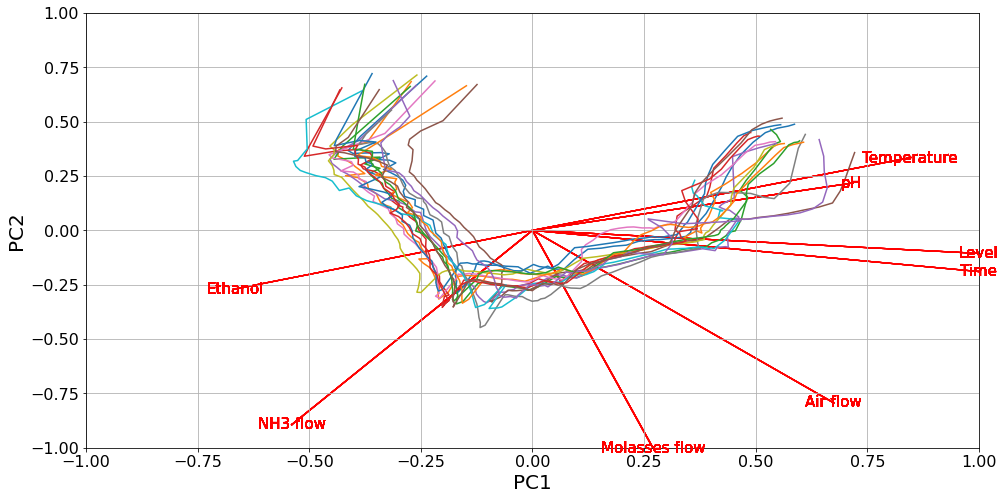

In [12]:
from sklearn.preprocessing import MaxAbsScaler
plt.rcParams["figure.figsize"] = [16,8]
for bat in list(set(df.index.values)):
    myplot(new_score[[('PC1', bat),('PC2', bat)]],loadings_pd.iloc[:,:2],loading_labels=loadings_pd.index,score_labels=scores_pd.index)
plt.grid()
plt.show()


### 2.1.6 Explain this graph. In which quarter do the batches start and end? What happens at the kink where the direction of the lines changes? Can you tell from this graph which variables do not change in the first phase and which in the second phase?


Start from the second, and end in the first quarter.

* Before the kink, the first phase:
    * Alomost no change in NH3. Bthanol, Temperature or PH changes not much.
    * Obviuous change: Molasses increases as time increases,
    * Air flow or level also increases in some lower levels.
    
* After the kink, the second phase:
    * Almost no change in Malosses flow.
    * Obvious change: Ethanol decreases, Temperature and PH increase.
    * Lebel increases, NH3 flow begins to drop. A little bit increase for Air flow.

### 2.1.7 Plot the cumulative explained variance. How much variance do the first two principal components capture?


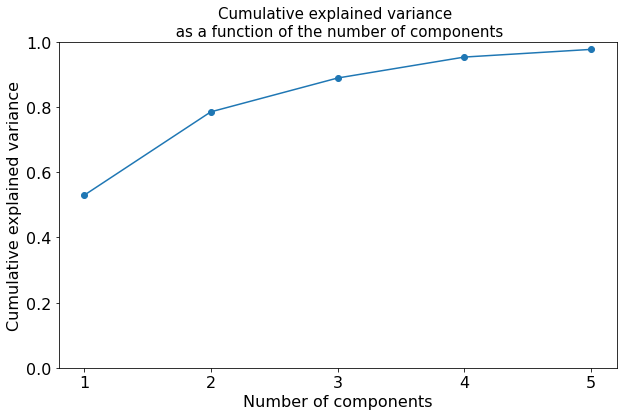

The first 2 components describe 78.46737653782884% of the variance.


In [13]:
from matplotlib.ticker import MaxNLocator

fig = plt.figure(figsize=(10, 6))
sub0 = fig.add_subplot(111)
plt.plot(range(1,pca.n_components+1), np.cumsum(pca.explained_variance_ratio_),'-o')
plt.xlabel('Number of components', fontsize=16)
plt.ylabel('Cumulative explained variance', fontsize=16);
sub0.set_title('Cumulative explained variance \n as a function of the number of components', fontsize=15)
plt.tick_params(labelsize=16)
sub0.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.ylim(0,1)
plt.show()
print("The first 2 components describe {}% of the variance.".format(np.cumsum(pca.explained_variance_ratio_)[1]*100))


### 2.2.1  Load the data, and repeat the same procedure as in the steps 3-4 of the previous section with the exception of the PCA modeling. Here, instead of fit the data to the model and transform, you will only transform them with the model object you created in the previous section.

In [14]:
today = pd.read_excel('todays_batches.xlsx')
today

,Unnamed: 0,Primary ID,BatchID,Time,Ethanol,Temperature,Molasses flow,NH3 flow,Air flow,Level,pH
0,2573,2574,Ya,0.000000,0.30350,29.0885,-0.70954,0.00356,1250.69,41.9216,4.86282
1,2574,2575,Ya,0.166667,0.41224,29.5509,-1.49002,0.00712,2040.08,41.9911,4.00324
2,2575,2576,Ya,0.333333,1.16614,29.9639,-1.63193,0.00712,2235.08,42.3624,4.05839
3,2576,2577,Ya,0.500000,2.22696,29.9746,1280.07000,82.08680,2419.08,42.8531,4.35465
4,2577,2578,Ya,0.666667,3.13590,29.9466,844.09600,74.65800,2603.53,43.2146,4.76967
...,...,...,...,...,...,...,...,...,...,...,...
161,2734,2735,Za,13.000000,0.01637,33.2882,301.55000,0.05000,6794.76,57.2191,6.38039
162,2735,2736,Za,13.166700,0.01575,33.3834,161.95900,0.04286,6820.50,57.2289,6.48979
163,2736,2737,Za,13.333300,0.01512,33.4438,75.58330,0.03214,6698.80,57.2021,6.55989
164,2737,2738,Za,13.500000,0.01444,33.4531,61.79870,0.06429,6775.14,57.0425,6.59559


In [15]:
today_df = today.drop(['Unnamed: 0','Primary ID'], axis =1)
today_df.set_index('BatchID',inplace=True)
today_df

,Time,Ethanol,Temperature,Molasses flow,NH3 flow,Air flow,Level,pH
BatchID,,,,,,,,
Ya,0.000000,0.30350,29.0885,-0.70954,0.00356,1250.69,41.9216,4.86282
Ya,0.166667,0.41224,29.5509,-1.49002,0.00712,2040.08,41.9911,4.00324
Ya,0.333333,1.16614,29.9639,-1.63193,0.00712,2235.08,42.3624,4.05839
Ya,0.500000,2.22696,29.9746,1280.07000,82.08680,2419.08,42.8531,4.35465
Ya,0.666667,3.13590,29.9466,844.09600,74.65800,2603.53,43.2146,4.76967
...,...,...,...,...,...,...,...,...
Za,13.000000,0.01637,33.2882,301.55000,0.05000,6794.76,57.2191,6.38039
Za,13.166700,0.01575,33.3834,161.95900,0.04286,6820.50,57.2289,6.48979
Za,13.333300,0.01512,33.4438,75.58330,0.03214,6698.80,57.2021,6.55989


In [16]:
today_scaled = StandardScaler().fit_transform(today_df)     #pre-process the data
today_PC_scores = pca.fit_transform(today_scaled)
scores_today = pd.DataFrame(data = today_PC_scores,columns = ['PC1', 'PC2', 'PC3','PC4','PC5'],index = today_df.index)
scores_today  

,PC1,PC2,PC3,PC4,PC5
BatchID,,,,,
Ya,-3.095247,0.858348,3.007975,0.001562,0.792921
Ya,-3.744019,0.993014,2.492396,-2.191579,0.353511
Ya,-3.521441,0.796706,2.435251,-2.173744,0.205332
Ya,-2.990482,1.862780,1.242177,-1.304306,0.102705
Ya,-2.655627,1.227312,1.426620,-0.287240,0.079666
...,...,...,...,...,...
Za,4.038087,-1.557512,1.710055,1.651320,-0.055672
Za,4.182185,-1.679932,1.801278,1.908783,-0.143664
Za,4.265971,-1.729211,1.908275,2.066825,-0.199880


In [17]:
loadings_today = pd.DataFrame(data = pca.components_.T,columns = ['PC1', 'PC2', 'PC3','PC4','PC5'],index = today_df.columns)
loadings_today     #Extract the loadings.

,PC1,PC2,PC3,PC4,PC5
Time,0.474224,-0.182056,-0.122818,-0.245844,-0.183772
Ethanol,-0.288549,-0.487908,-0.313743,-0.054727,-0.035690
Temperature,0.463797,-0.004013,0.243016,-0.264771,-0.506081
Molasses flow,0.224908,0.502010,-0.376653,-0.148133,0.539534
NH3 flow,-0.037937,0.542617,-0.449081,0.250611,-0.575564
Air flow,0.161048,-0.400095,-0.684261,0.053484,-0.042966
Level,0.507666,-0.056292,-0.025853,-0.137150,0.274860
pH,0.375578,-0.138179,0.122483,0.871804,0.095242


In [18]:
temp_today = scores_today.copy()
temp_today["Time"] = today.loc[:,'Time'].values
new_score_today = pd.pivot_table(temp_today, index = ['Time'],columns = ['BatchID'])
new_score_today

PC1                 PC2                 PC3            \
BatchID          Ya        Za        Ya        Za        Ya        Za   
Time                                                                    
0.000000  -3.095247 -0.645201  0.858348  0.182692  3.007975  3.742119   
0.166667  -3.744019 -1.861544  0.993014  1.490843  2.492396  2.252612   
0.333333  -3.521441 -2.431072  0.796706  1.860953  2.435251  1.769715   
0.500000  -2.990482 -2.076405  1.862780  1.680338  1.242177  1.844990   
0.666667  -2.655627 -1.838744  1.227312  1.299824  1.426620  2.155217   
...             ...       ...       ...       ...       ...       ...   
13.000000  1.980390  4.038087 -1.014400 -1.557512  0.936131  1.710055   
13.166700  2.033354  4.182185 -1.023144 -1.679932  0.944055  1.801278   
13.333300  2.103901  4.265971 -1.023089 -1.729211  0.970732  1.908275   
13.500000  2.094587  4.311200 -1.185871 -1.771251  1.082753  1.894597   
13.666700  1.882435  4.367412 -1.130862 -1.786885  1.669682  1.907438   

                PC4                 PC5            
BatchID          Ya        Za        Ya        Za  
Time                                               
0.000000   0.001562  3.777105  0.792921  0.745785  
0.166667  -2.191579  1.330811  0.353511  0.433556  
0.333333  -2.173744 -0.453439  0.205332  0.026653  
0.500000  -1.304306 -0.303914  0.102705 -0.173748  
0.666667  -0.287240  0.272754  0.079666 -0.075803  
...             ...       ...       ...       ...  
13.000000 -0.986566  1.651320 -0.256712 -0.055672  
13.166700 -0.888077  1.908783 -0.209877 -0.143664  
13.333300 -0.829092  2.066825 -0.187989 -0.199880  
13.500000 -0.704273  2.151547 -0.315740 -0.221418  
13.666700 -0.486108  2.185166 -0.385101 -0.215792  

[83 rows x 10 columns]

### 2.2.2 Plot the same scores-loadings plot for the data in the batches you used to develop the model with solid lines. Overlay the new incoming data from the two current batches with dashed lines and two different colours to distinguish them. Also, add a legend for the two batches so that the viewer can distinguish them.

In [19]:
def myplot(scores,loadings,loading_labels=None,score_labels=None):
    # adjusting the scores to fit in (-1,1)
    xt = scores[('PC1', )].values[:,0]
    yt = scores[('PC2', )].values[:,0]
    n = loadings.shape[0]
    scalext = 1.0/(xt.max() - xt.min())
    scaleyt = 1.0/(yt.max() - yt.min())
    xt_scaled = xt * scalext
    yt_scaled = yt * scaleyt
    # adjusting the loadings to fit in (-1,1)
    p = loadings
    p_scaled = MaxAbsScaler().fit_transform(p)
    
    #plt.scatter(xs * scalex,ys * scaley, s=10)
    plt.plot(xt_scaled, yt_scaled,label='original')
        
    for i in range(n):
        plt.arrow(0, 0, p_scaled[i,0], p_scaled[i,1], alpha = 0.5,color='r')
        if loading_labels is None:
            plt.text(p_scaled[i,0], p_scaled[i,1], "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(p_scaled[i,0], p_scaled[i,1], loading_labels[i], color = 'r', ha = 'center', va = 'center',size =15)
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1), fontsize=20);
    plt.ylabel("PC{}".format(2), fontsize=20);
    plt.tick_params(labelsize=16)
    plt.grid()

def todayplot(scores,loadings,loading_labels=None,score_labels=None):   #new plot function for today's data
    # adjusting the scores to fit in (-1,1)
    xt = scores[('PC1', )].values[:,0]
    yt = scores[('PC2', )].values[:,0]
    n = loadings.shape[0]
    scalext = 1.0/(xt.max() - xt.min())
    scaleyt = 1.0/(yt.max() - yt.min())
    xt_scaled = xt * scalext
    yt_scaled = yt * scaleyt
    # adjusting the loadings to fit in (-1,1)
    p = loadings
    p_scaled = MaxAbsScaler().fit_transform(p)
    
    #plt.scatter(xs * scalex,ys * scaley, s=10)
    plt.plot(xt_scaled, yt_scaled,linestyle='dashed',label='today')
        
    for i in range(n):
        plt.arrow(0, 0, p_scaled[i,0], p_scaled[i,1], alpha = 0.5,color='black')
        if loading_labels is None:
            plt.text(p_scaled[i,0], p_scaled[i,1], "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(p_scaled[i,0], p_scaled[i,1], loading_labels[i], color = 'purple', ha = 'center', va = 'center',size =15)
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1), fontsize=20);
    plt.ylabel("PC{}".format(2), fontsize=20);
    plt.tick_params(labelsize=16)
    plt.grid()


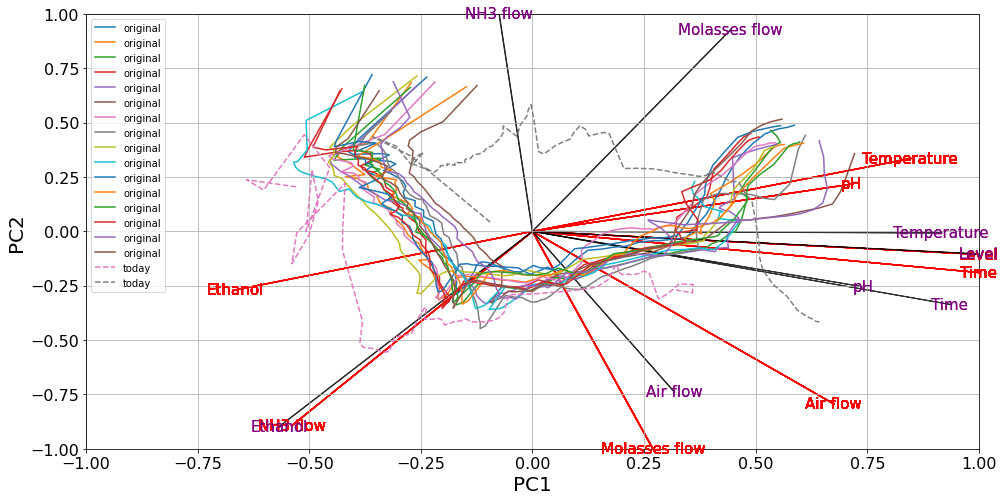

In [20]:
from sklearn.preprocessing import MaxAbsScaler
plt.rcParams["figure.figsize"] = [16,8]
for bat in list(set(df.index.values)):
    myplot(new_score[[('PC1', bat),('PC2', bat)]],loadings_pd.iloc[:,:2],loading_labels=loadings_pd.index,score_labels=scores_pd.index)
for bat in list(set(today_df.index.values)):
    todayplot(new_score_today[[('PC1', bat),('PC2', bat)]],loadings_today.iloc[:,:2],loading_labels=loadings_today.index,score_labels=scores_today.index)
plt.grid()
plt.legend()
plt.show()

### 2.2.3  Do the batches show behaviour similar to that of the reference ones or there are outliers indicating potential problems?


The two 'today' are Bacth named 'Ya' and 'Za' repspectively. As the original Time and the New Time are close to each other, we could compare the other vectors easily. But the comparison of lines indicating Batch are not much clear, as the direction of the vector change, the trendline also follow the different base.

I think both of the two seems to be outliers, even though the 'Za' has a similar kink, but it does not follow the pattern closely. The line of 'Ya' even goes in the opposite direction during some time period. 

As some angles bewteen the original and the new vetor exceed 90 degree, means the they will have a opposite change as time goes, such as Molasses flow and NH3 flow.